In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

from itertools import cycle
from mpl_toolkits.mplot3d import Axes3D

In [2]:
with open("../../data/hizandis_params.pkl", "rb") as f:
    params = pickle.load(f)

params.head()

,alpha,beta,metastability,chimera
0,1.519,0.189,0.003556,0.036281
1,0.871,0.358,0.004720,0.030751
2,0.932,0.000,0.010014,0.057274
3,0.608,0.147,0.007932,0.047694
4,0.668,0.168,0.009036,0.046186


In [3]:
params["type"] = 1
params.loc[params["chimera"] >= 0.05, "type"] += 1

In [4]:
c = params.pivot_table(values="chimera", index="beta", columns="alpha")

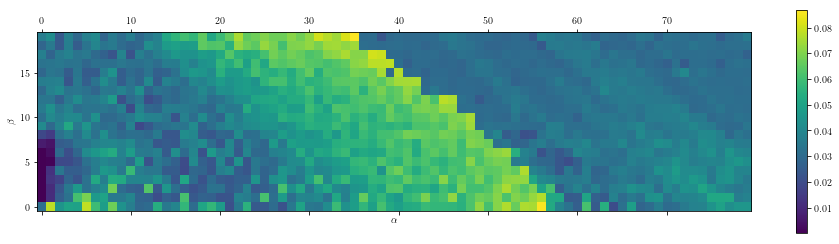

In [5]:
plt.matshow(c.values, origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

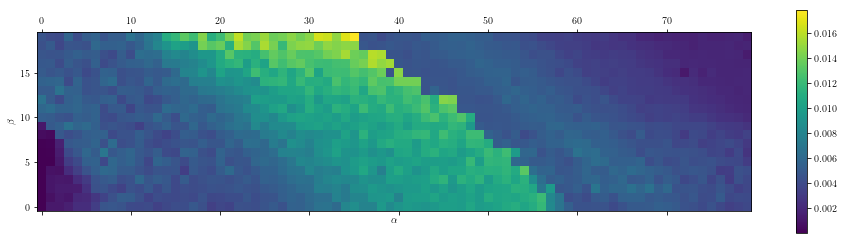

In [6]:
m = params.pivot_table(values="metastability", index="beta", columns="alpha")

plt.matshow(m.values, origin="lower")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\beta$")
# plt.xlim([params["alpha"].min(), params["alpha"].max()])
# plt.ylim([params["beta"].min(), params["beta"].max()])
plt.colorbar();

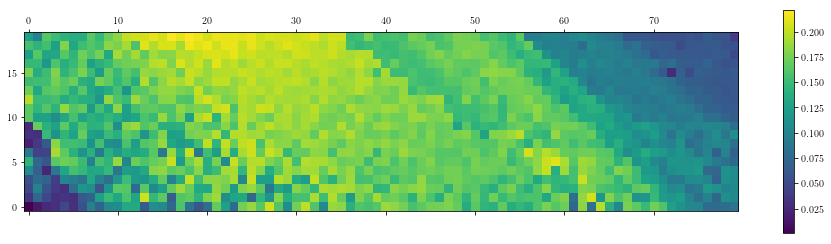

In [7]:
plt.matshow((m/c).values, origin="lower")
plt.colorbar()

In [8]:
with open("../../data/0.709-0.400.pkl", "rb") as f:
    data = pickle.load(f)

In [9]:
tmax = 4000
N = 100*tmax
t = np.linspace(0, tmax, N)

In [10]:
vals = data[1].sol(t).T
del(data)

In [11]:
vals = vals.reshape(N, 3, -1)

In [12]:
vals.shape

(400000, 3, 213)

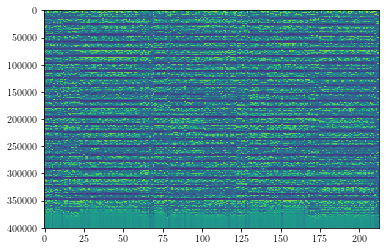

In [13]:
plt.imshow(vals[:, 0, :], aspect="auto")

In [14]:
N-0.999*N

400.0

In [15]:
cortices = [[0, 38],
            [38, 73],
            [73, 98],
            [98, 119],
            [119, 139],
            [139, 152],
            [152, 164],
            [164, 175],
            [175, 186],
            [186, 195],
            [195, 203],
            [203, 210],
            [210, 213]]

In [16]:
def plot_final_state(
    y,
    cortices=None, legend=False,
    title=None, channel=0,
    markers=cycle(["ro", "k^", "gX", "bD"]),
    ylim=[-1.5, 2.5]
):
    if cortices is None:
        cortices = [[0, y.size]]
#     m = iter(markers[:len(cortices)])
    m = markers
    for cortex in cortices:
        plt.plot(range(*cortex), y[-1, channel, cortex[0]:cortex[1]], next(m), label=f"{cortex[0]} - {cortex[1] - 1}")
    if legend:
        plt.legend(loc="best")
    if title:
        plt.title(title)
    plt.ylim(ylim)

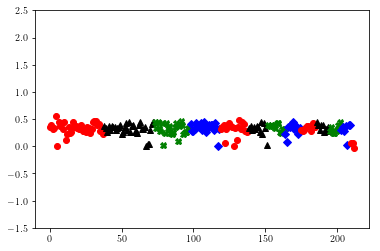

In [17]:
plot_final_state(vals, cortices=cortices)

Text(0.5,0,'t')

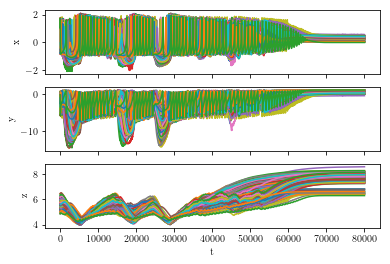

In [18]:
fig, [ax1, ax2, ax3] = plt.subplots(3, 1, sharex=True)

ax1.plot(vals[int(0.8*N):, 0, :])
ax1.set_ylabel("x")
ax2.plot(vals[int(0.8*N):, 1, :])
ax2.set_ylabel("y")
ax3.plot(vals[int(0.8*N):, 2, :])
ax3.set_ylabel("z")
ax3.set_xlabel("t")

In [27]:
with open("diffs.txt", "r") as f:
    diffs = f.read().rstrip()

In [32]:
a = np.array([list(map(float, i.replace(".pkl", "").split("-"))) for i in diffs.split("\n")])

(0, 0.4)

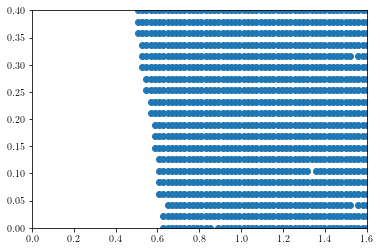

In [36]:
plt.plot(a[:, 0], a[:, 1], "o")
plt.xlim([0, 1.6])
plt.ylim([0, 0.4])